In [1]:
import sys
sys.path.append('../')

from src import *

# Iris Analysis

In [2]:
df = load_data('../data/processed/processed_iris.csv')

Data loaded successfully.


In [3]:
X = df.drop(columns=['Id', 'Species'], axis=1)
y = df['Species']
X_train, X_test, y_train, y_test = split_data(X, y)

Data split successfully.


In [4]:
X_train = data_normalize(X_train, method='minmax')

Data normalized successfully.


In [5]:
X_test = data_normalize(X_test, method='minmax')

Data normalized successfully.


In [6]:
input_shape = X_train.shape[1]
latent_dim = 2
topology = [16, 8, 4]

In [7]:
encoder = build_encoder(latent_dim, input_shape, topology)

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_input_layer │ (None, 4)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 16)        │         80 │ encoder_input_la… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 8)         │        136 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 4)         │         36 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean_layer        │ (None, 2)         │         10 │ dense_2[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var_layer     │ (None, 2)         │         10 │ dense_2[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling (Sampling) │ (None, 2)         │          0 │ z_mean_layer[0][… │
│                     │                   │            │ z_log_var_layer[… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 272 (1.06 KB)

 Trainable params: 272 (1.06 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
decoder = build_decoder(latent_dim, input_shape, topology)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ decoder_input_layer             │ (None, 2)              │             0 │
│ (InputLayer)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_outputs (Dense)         │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264 (1.03 KB)

 Trainable params: 264 (1.03 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
vae = VAE(encoder, decoder, beta=0.1)

In [10]:
optimizer = optimizer_adam(lr=0.0003)
vae.compile(optimizer=optimizer)

Successfuly created optimizer: Adam with learning rate 0.0003


In [11]:
model_checkpoint = model_checkpoint_callback("./checkpoint.keras")

Model checkpoint callback created.


In [12]:
loss_tracker = LossTracker()

In [13]:
vae.fit(
    X_train, 
    epochs=100, 
    batch_size=8, 
    validation_data=(X_test, None), 
    callbacks=[model_checkpoint, loss_tracker]
)

Epoch 1/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - kl_loss: 0.0421 - reconstruction_loss: 2.3560 - total_loss: 2.3603Epoch 1, Loss: 3.2958
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - kl_loss: 0.0568 - reconstruction_loss: 3.3798 - total_loss: 3.3854 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 2/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - kl_loss: 0.0666 - reconstruction_loss: 2.4694 - total_loss: 2.4761Epoch 2, Loss: 2.6256
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - kl_loss: 0.0483 - reconstruction_loss: 2.4613 - total_loss: 2.4662 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 3/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - kl_loss: 0.0346 - reconstruction_loss: 2.1891 - total_loss: 2.1926Epoch 3, Loss: 2.2218
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - kl_loss: 0.0324 - reconstruction_loss: 2.2270 - total_loss: 2.2302 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+0

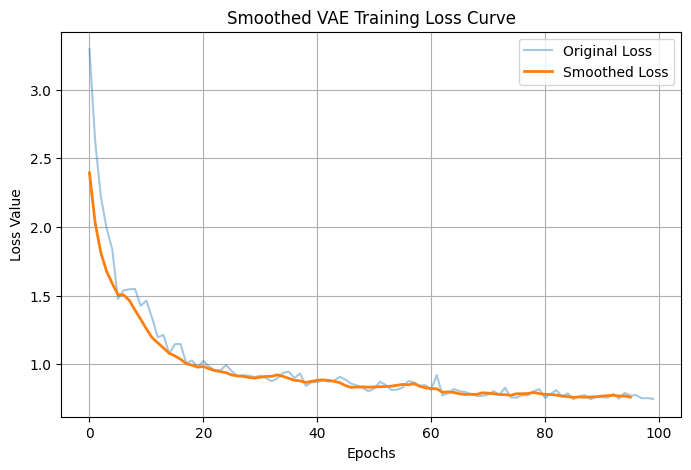

In [14]:
plot_loss(loss_tracker)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


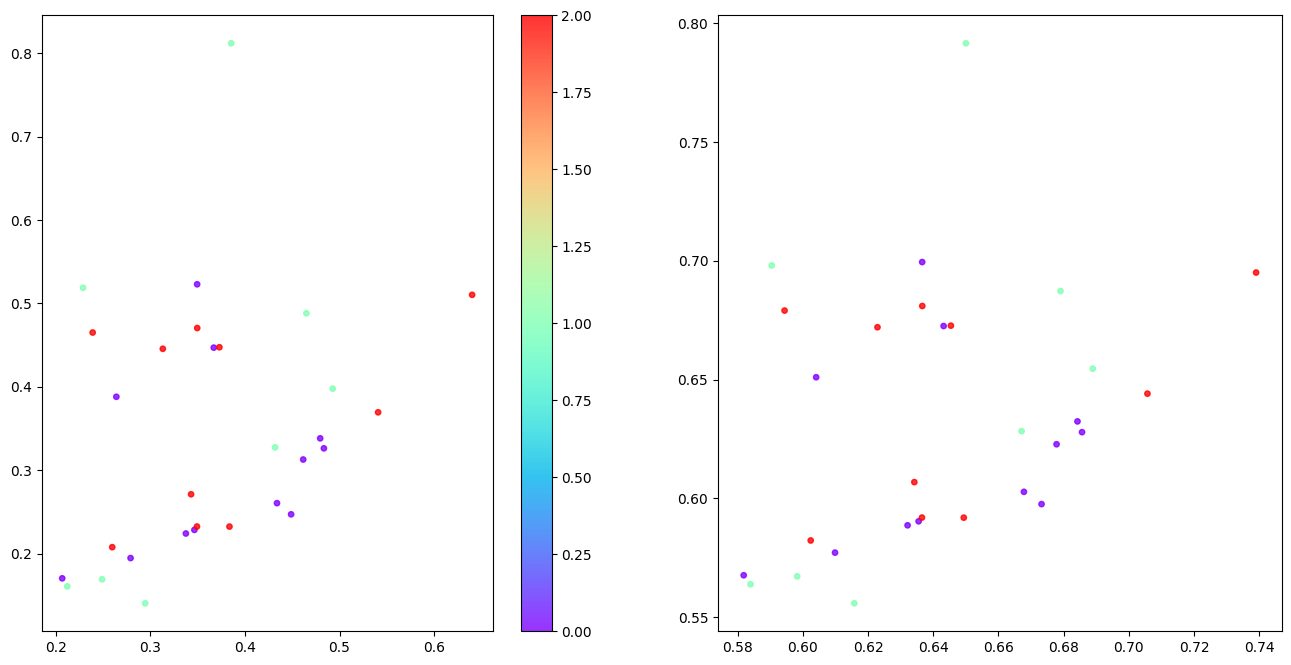

In [15]:
plot_latent_space(vae, X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


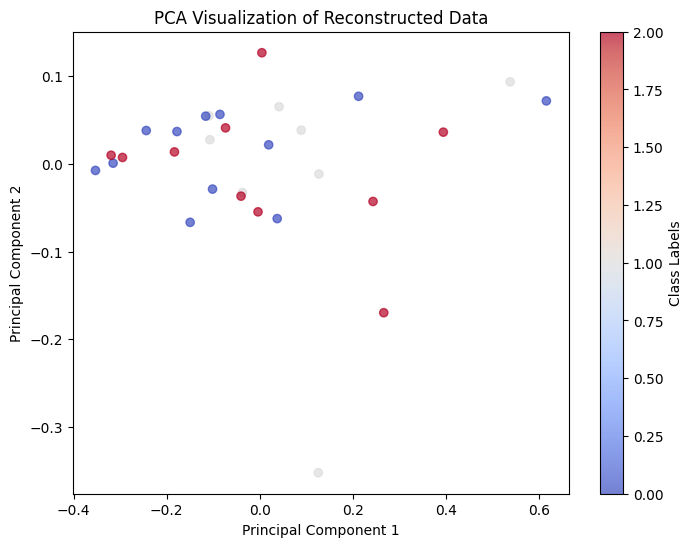

Explained variance ratio: [0.8586821  0.11710525]


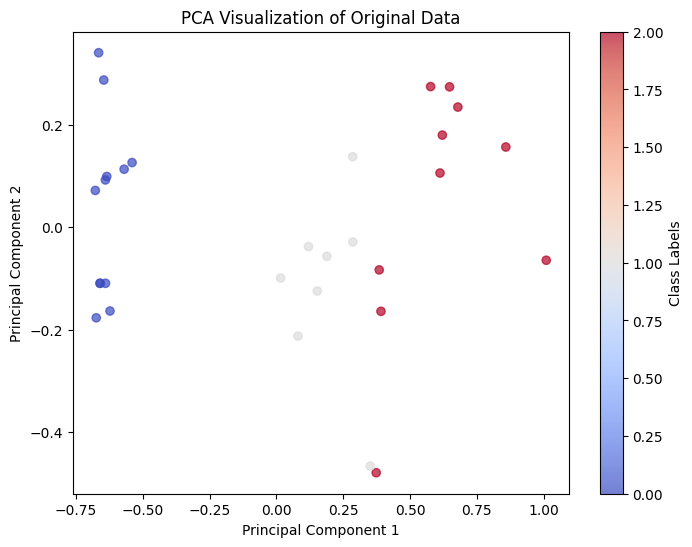

Explained variance ratio: [0.8531231 0.1086995]


In [91]:
z_mean, z_log_var, reconstructions, labels = predict(vae, X_test, y_test)
plot_reduced_pca(reconstructions, labels, name='Reconstructed')
plot_reduced_pca(X_test, labels, name='Original')

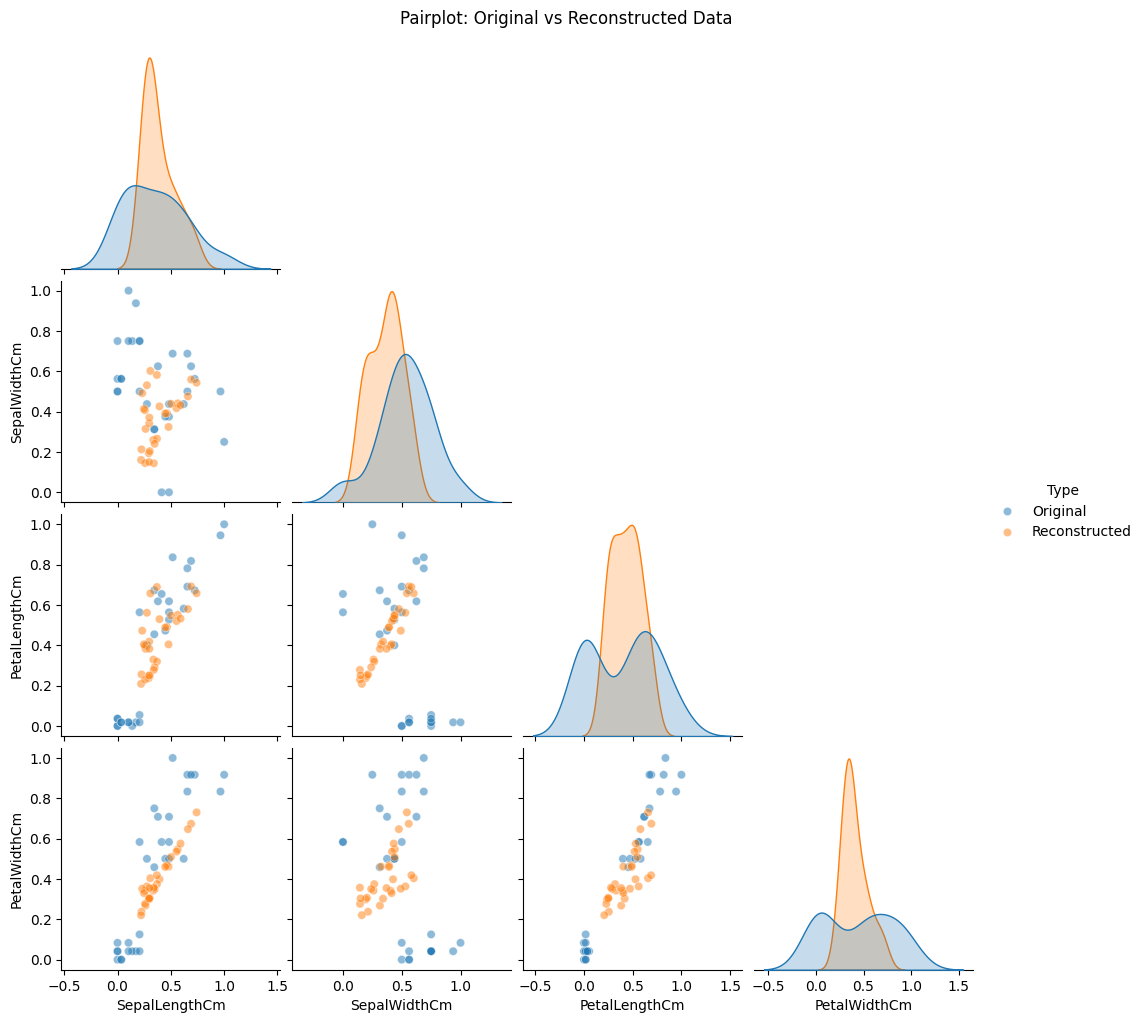

In [ ]:
plot_pairplot(X_test, reconstructions, X.columns)

Conclusões de análise: 
- O gráfico da perda mostra que o modelo aprendeu com os dados
- O plot do espaço latente não mostra agrupamentos bem definidos mesmo apos estabilização da função de perda.
- Os dados reconstruidos demonstrar aproximação aos dados originais, conseguimos verificar que a classe azul está se agrupando para a esquerda, a classe verde para o centro e a classe vermelha esta se deslocando para a direita.

Conclusões de criação:
- A perda sempre precisa ser um valor positivo, se não for, algo está errado na criação do modelo
- O intervalo em que os dados se encontram apos o scaling define qual o calculo da perda possivel, primeiro utilizei o scaling standard e o calculo da perda usando binary crossentropy, a perda estava variando entre positivo e negativo, o modelo aprendia como centralizar os dados reconstruidos, assim basicamente todos os dados tinham valores iguais. Apor correção do scaling para minmax 0 até 1, o problema foi solucionado, a função de perda corrigida permitiu ao modelo aprender e as features dos dados reconstruidos ficaram muito mais condizentes com os dados originais.

# Wine Dataset